In [1]:
# !pip install qiskit

# This is a program

In [2]:
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram


############# CREATE #####################
qr = QuantumRegister(1, 'qbit')
cr = ClassicalRegister(1, 'bit')
qc = QuantumCircuit(qr, cr)

qc.x(0)
qc.measure(0, 0)

qc.draw(output='mpl')
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qbit[1];
creg bit[1];
x qbit[0];
measure qbit[0] -> bit[0];



# Run the code on a real quantum computer
## IBMQ Backends

![](https://miro.medium.com/max/700/1*YuR-BtRRTxLQ5EXW8fbUEQ.png)

`Provider` - IBM Quantum Experience account provider. A server to ask about machines.

`Backend` - IBM Quantum Experience device. Quantum computer.

## Obtaining the token

Visit https://quantum-computing.ibm.com/account and get the key!

Visit https://quantum-computing.ibm.com/services?services=systems&systems=yours and choose a backend (1 bit is ok).

In [3]:
from qiskit import IBMQ, execute

In [4]:
token = open('token.ibm').read()

In [ ]:
IBMQ.save_account(token)

In [6]:
IBMQ.load_account()

print("======== Provider list =======")
print(list(IBMQ.providers()))

provider = IBMQ.get_provider('ibm-q')
print("\n========== QPU list ==========")
print([
        (qpu.name(), qpu.configuration().n_qubits, qpu.status().pending_jobs) 
        for qpu in provider.backends()])

print("\n========== QPU info ==========")
machine = "ibmq_quito"               # try lima, belem, manila, quito 
qpu = provider.get_backend(machine) 

nq = qpu.configuration().n_qubits
my_limit = qpu.job_limit().maximum_jobs
my_jobs = qpu.job_limit().active_jobs

status = qpu.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(f"Works = {is_operational}, Queue = {jobs_in_queue}, "
      f"My Job Limit = {my_jobs}/{my_limit}, Qubits = {nq}")

======== Provider list =======
[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

========== QPU list ==========
[('ibmq_qasm_simulator', 32, 1), ('ibmq_lima', 5, 44), ('ibmq_belem', 5, 161), ('ibmq_quito', 5, 42), ('simulator_statevector', 32, 2), ('simulator_mps', 100, 2), ('simulator_extended_stabilizer', 63, 1), ('simulator_stabilizer', 5000, 1), ('ibmq_manila', 5, 114), ('ibm_nairobi', 7, 210), ('ibm_oslo', 7, 261)]

========== QPU info ==========
Works = True, Queue = 42, My Job Limit = 3/5, Qubits = 5


In [7]:
qpu = provider.get_backend("ibmq_quito")
job = execute(qc, backend=qpu, shots=40)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


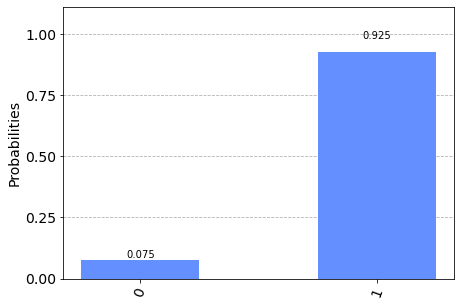

In [8]:
counts = job.result().get_counts()
plot_histogram(counts)